#***Lab 2: Foundations of Text Mining***

## **Part 1 - Basics**

##**Exercise 1: Word Count/Frequency Analysis**

* Count most common words or phrases in a document

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Top 15 Most Frequent Words in Business Reviews:
         Word  Frequency
0     product          3
1    delivery          2
2        fast          2
3   excellent          2
4     service          2
5      prices          2
6        slow          2
7     quality          1
8    customer          1
9    terrible          1
10      order          1
11      great          1
12       good          1
13  discounts          1
14  satisfied          1


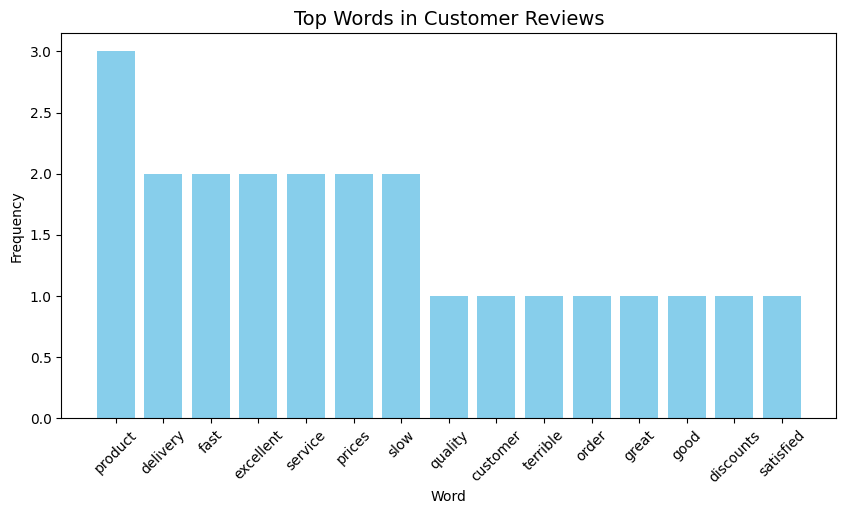

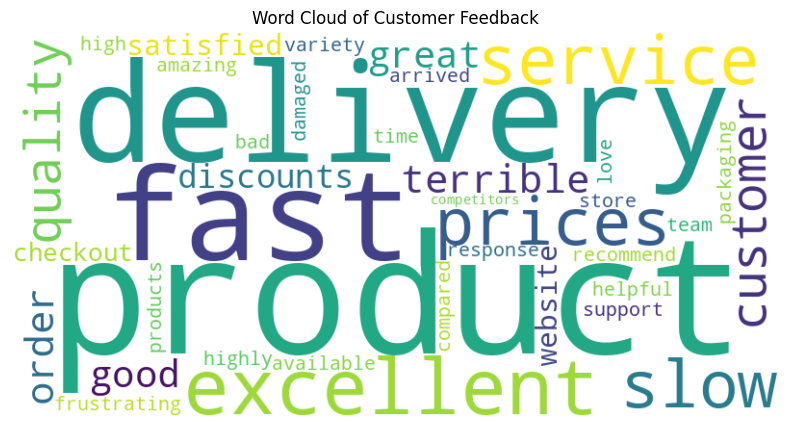

In [1]:
# Packages
import pandas as pd
import re
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download stopwords if not already available
nltk.download("stopwords")
from nltk.corpus import stopwords

# ---------------------------------
# 1. Example Business Context Data
# ---------------------------------
reviews = [
    "The delivery was fast and the product quality is excellent!",
    "Customer service was terrible, I will not order again.",
    "Great prices and good discounts, very satisfied.",
    "The website is slow and checkout was frustrating.",
    "Amazing product! Highly recommend this store.",
    "Support team was helpful but response time was slow.",
    "I love the variety of products available here.",
    "Bad packaging, product was damaged when it arrived.",
    "Excellent service and fast delivery.",
    "Prices are too high compared to competitors."
]

# Convert to DataFrame (as in business feedback analysis)
df = pd.DataFrame(reviews, columns=["review"])

# ----------------------------
# 2. Preprocessing Function
# ----------------------------
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)  # keep only letters
    tokens = text.split()
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# ----------------------------
# 3. Tokenize All Reviews
# ----------------------------
all_tokens = []
for r in df["review"]:
    all_tokens.extend(preprocess(r))

# ----------------------------
# 4. Word Frequency Count
# ----------------------------
word_freq = Counter(all_tokens)
freq_df = pd.DataFrame(word_freq.most_common(15), columns=["Word", "Frequency"])

print("Top 15 Most Frequent Words in Business Reviews:")
print(freq_df)

# ----------------------------
# 5. Visualization: Bar Chart
# ----------------------------
plt.figure(figsize=(10,5))
plt.bar(freq_df["Word"], freq_df["Frequency"], color="skyblue")
plt.title("Top Words in Customer Reviews", fontsize=14)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# 6. Visualization: Word Cloud
# ----------------------------
wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Customer Feedback")
plt.show()

##**Exercise 2: Concordance/KWIC**

* Search for a keyword and see its surrounding context

* Used a lot in Linguistics and Qualitative Research

In [4]:
# Packages
import pandas as pd
import re

# ---------------------------------
# 1. Example Business Context Data
# ---------------------------------
reviews = [
    "The delivery was fast and the product quality is excellent!",
    "Customer service was terrible, I will not order again.",
    "Great prices and good discounts, very satisfied.",
    "The website is slow and checkout was frustrating.",
    "Amazing product! Highly recommend this store.",
    "Support team was helpful but response time was slow.",
    "I love the variety of products available here.",
    "Bad packaging, product was damaged when it arrived.",
    "Excellent service and fast delivery.",
    "Prices are too high compared to competitors."
]

df = pd.DataFrame(reviews, columns=["review"])

# ----------------------------
# 2. Concordance Function (KWIC)
# ----------------------------
def concordance(texts, keyword, window=5):
    results = []
    keyword = keyword.lower()
    for doc in texts:
        # Preprocess: keep only letters + spaces
        clean_doc = re.sub(r"[^a-zA-Z\s]", "", doc).lower()
        tokens = clean_doc.split()
        for i, token in enumerate(tokens):
            if token == keyword:
                left_context = " ".join(tokens[max(i-window,0):i])
                right_context = " ".join(tokens[i+1:i+window+1])
                results.append((left_context, token, right_context))
    return results

# ----------------------------------
# 3. Run KWIC for Business Keywords
# ----------------------------------
keyword = "service"   # you can try "delivery", "slow", "product", etc.
kwic_results = concordance(df["review"], keyword, window=4)

# Display as DataFrame
kwic_df = pd.DataFrame(kwic_results, columns=["Left Context", "Keyword", "Right Context"])
print(f"\nKWIC Analysis for keyword: '{keyword}'\n")
print(kwic_df)

# ----------------------------
# 4. Example: Export Results
# ----------------------------
# kwic_df.to_csv("kwic_results.csv", index=False). #comment/uncomment as needed


KWIC Analysis for keyword: 'service'

  Left Context  Keyword        Right Context
0     customer  service  was terrible i will
1    excellent  service    and fast delivery


##**Exercise 3: Lexicon-Based Sentiment Analysis**

* Includes a predefined dictionary of positive/negative words

* For example, the word **"happy"** is taken to be **positive** while the word **"angry"** is taken to be **negative**.

In [6]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


                                              Review Sentiment
0  The new store layout is fantastic! Easy to fin...  Positive
1           Customer service was rude and unhelpful.  Negative
2   Great discounts this week, saved a lot of money!  Positive
3   Delivery was late and the packaging was damaged.  Negative
4  The product quality is outstanding. Highly rec...  Positive
5            Checkout process is confusing and slow.  Negative
6               Fast shipping and excellent service.  Positive
7  The return policy is terrible, I will never sh...  Negative
8        Staff were friendly and very knowledgeable.  Positive
9       Prices are too high compared to competitors.   Neutral

Sentiment distribution:
Sentiment
Positive    5
Negative    4
Neutral     1
Name: count, dtype: int64


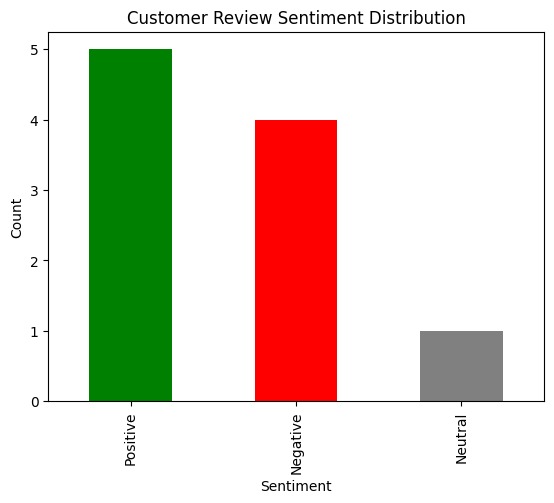

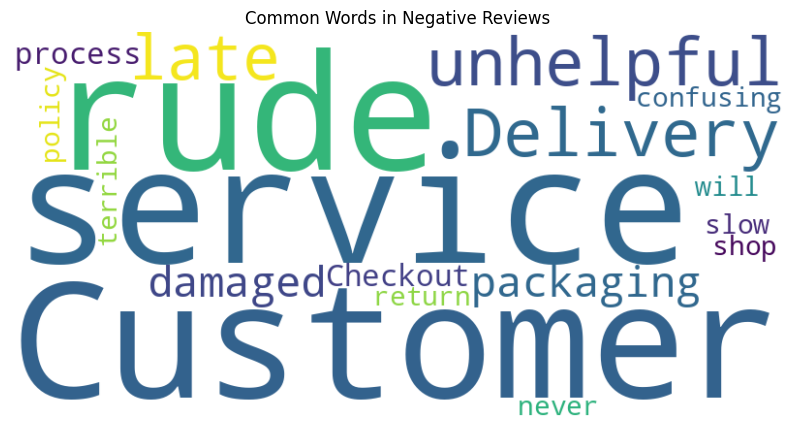

In [7]:
# Install required packages
# !pip install nltk vaderSentiment wordcloud matplotlib

import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ---------------------------
# 1. Example Business Dataset
# ---------------------------
reviews = [
    "The new store layout is fantastic! Easy to find products.",
    "Customer service was rude and unhelpful.",
    "Great discounts this week, saved a lot of money!",
    "Delivery was late and the packaging was damaged.",
    "The product quality is outstanding. Highly recommend.",
    "Checkout process is confusing and slow.",
    "Fast shipping and excellent service.",
    "The return policy is terrible, I will never shop here again.",
    "Staff were friendly and very knowledgeable.",
    "Prices are too high compared to competitors."
]

# Create DataFrame
df = pd.DataFrame(reviews, columns=["Review"])

# ---------------------------
# 2. Sentiment Analysis
# ---------------------------
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    # Label sentiment based on compound score
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Review'].apply(get_sentiment)

# ---------------------------
# 3. Results
# ---------------------------
print(df)

# Sentiment counts
sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment distribution:")
print(sentiment_counts)

# ---------------------------
# 4. Visualization
# ---------------------------
# Bar chart of sentiments
sentiment_counts.plot(kind="bar", color=["green", "red", "gray"])
plt.title("Customer Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# WordCloud for Negative Reviews
negative_text = " ".join(df[df['Sentiment']=="Negative"]['Review'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Negative Reviews")
plt.show()


##**Exercise 4: Collocaton Detection**

* Used to identify frequent word pairs, i.e., words that frequently go together, like **"climate change"** and **"artificial intelligence"**.

Top collocations by frequency (bigram -> count):
customer service  -> 2
delivery time  -> 2
product quality  -> 2

Top collocations by PMI (bigram -> PMI score):
delivery time  -> 4.524
customer service  -> 3.939
product quality  -> 3.939


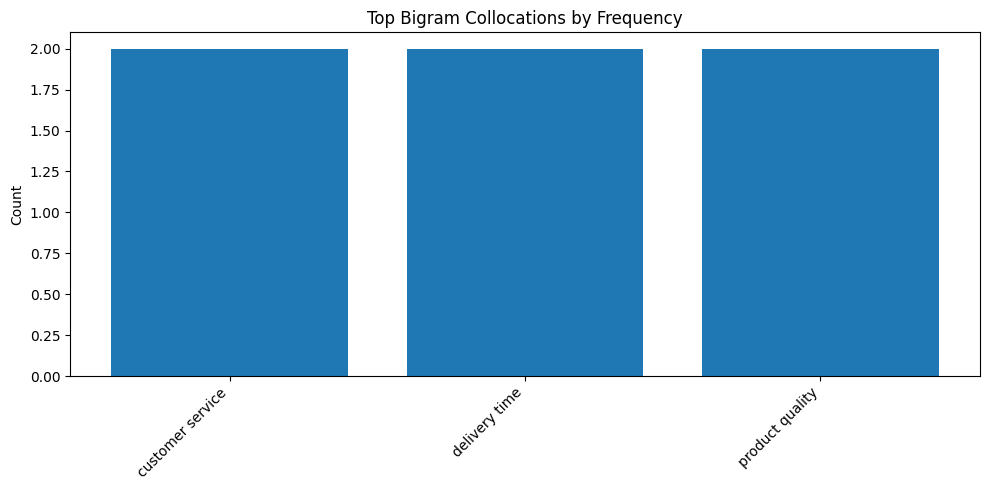

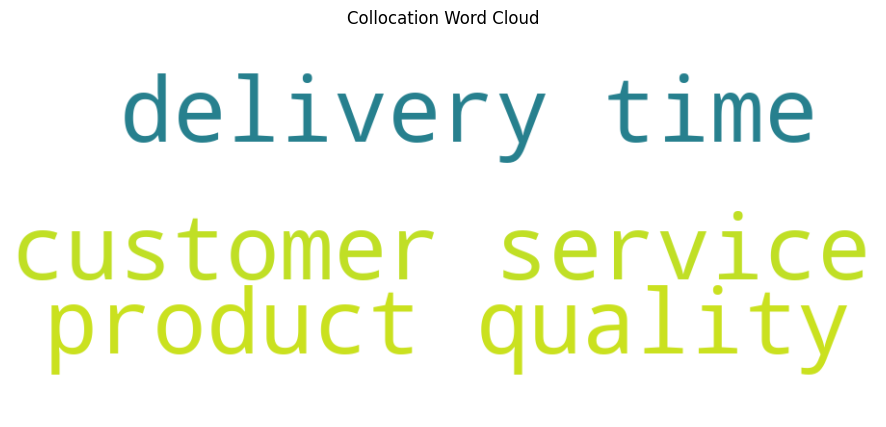


Saved collocations to collocations_results.csv


In [10]:
# Optional installs (uncomment if you need them)
# !pip install matplotlib wordcloud

import re
import math
from collections import Counter
import matplotlib.pyplot as plt

# Optional WordCloud (if installed)
try:
    from wordcloud import WordCloud
    HAVE_WORDCLOUD = True
except Exception:
    HAVE_WORDCLOUD = False

# -------------------------
# 0. Small built-in stopword set (fallback, no NLTK)
# -------------------------
STOPWORDS = {
    "a","about","above","after","again","against","all","am","an","and","any","are","aren't","as","at",
    "be","because","been","before","being","below","between","both","but","by",
    "could","couldn't",
    "did","didn't","do","does","doesn't","doing","don't",
    "down","during",
    "each",
    "few","for","from","further",
    "had","hadn't","has","hasn't","have","haven't","having",
    "he","he'd","he'll","he's","her","here","here's","hers","herself","him","himself","his","how","how's",
    "i","i'd","i'll","i'm","i've","if","in","into","is","isn't","it","it's","its","itself",
    "let's",
    "me","more","most","mustn't","my","myself",
    "no","nor","not",
    "of","off","on","once","only","or","other","ought","our","ours","ourselves","out","over","own",
    "same","she","she'd","she'll","she's","should","shouldn't","so","some","such",
    "than","that","that's","the","their","theirs","them","themselves","then","there","there's","these","they","they'd","they'll","they're","they've","this","those","through","to",
    "too","under","until","up","very",
    "was","wasn't","we","we'd","we'll","we're","we've","were","weren't","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with","won't","would","wouldn't",
    "you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"
}

# If wordcloud is available it has its own STOPWORDS set we can union
if HAVE_WORDCLOUD:
    try:
        from wordcloud import STOPWORDS as WC_STOP
        STOPWORDS = STOPWORDS.union(set([s.lower() for s in WC_STOP]))
    except Exception:
        pass

# -------------------------
# 1. Example Business Dataset (replace with your data)
# -------------------------
reviews = [
    "The customer service was very helpful and friendly.",
    "Delivery time was late and packaging was poor.",
    "The product quality is excellent, I love it!",
    "Terrible customer service, rude staff at checkout.",
    "Fast shipping and good product quality.",
    "The return policy is confusing and unfair.",
    "Excellent customer support and very responsive.",
    "The delivery time was fast and efficient.",
    "Poor product packaging, items were damaged.",
    "Great discounts and excellent shopping experience."
]

# -------------------------
# 2. Preprocessing & Tokenization (NO NLTK)
# -------------------------
def tokenize(text):
    # lower, remove non-alpha (keep spaces), split on whitespace
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    tokens = [t for t in text.split() if t and t not in STOPWORDS]
    return tokens

# Tokenize each review
tokenized_reviews = [tokenize(r) for r in reviews]

# Flatten tokens for unigram counts
all_tokens = [tok for doc in tokenized_reviews for tok in doc]

# -------------------------
# 3. Unigram & Bigram Counts
# -------------------------
unigram_counts = Counter(all_tokens)
total_unigrams = sum(unigram_counts.values())

# Build bigrams (within each review to respect sentence boundaries)
bigrams = []
for doc in tokenized_reviews:
    for i in range(len(doc)-1):
        bigrams.append((doc[i], doc[i+1]))

bigram_counts = Counter(bigrams)
total_bigrams = sum(bigram_counts.values())

# -------------------------
# 4. Frequency filter (adjustable)
# -------------------------
freq_threshold = 2
filtered_bigrams = {bg:cnt for bg,cnt in bigram_counts.items() if cnt >= freq_threshold}
# If none pass the threshold, relax it
if not filtered_bigrams:
    freq_threshold = 1
    filtered_bigrams = dict(bigram_counts)

# -------------------------
# 5. PMI calculation
# PMI(b1,b2) = log2( (count(b1,b2) * N) / (count(b1) * count(b2)) )
# where N = total_unigrams (common approximation)
# -------------------------
def compute_pmi(bigram, count_bigram, unigram_counts, N):
    w1, w2 = bigram
    c1 = unigram_counts.get(w1, 0)
    c2 = unigram_counts.get(w2, 0)
    if c1 == 0 or c2 == 0:
        return float("-inf")
    numerator = count_bigram * N
    denominator = c1 * c2
    # avoid zero/negative
    if denominator == 0 or numerator == 0:
        return float("-inf")
    return math.log2(numerator / denominator)

pmi_scores = {}
for bg, cnt in filtered_bigrams.items():
    pmi_scores[bg] = compute_pmi(bg, cnt, unigram_counts, total_unigrams)

# -------------------------
# 6. Top collocations by frequency and by PMI
# -------------------------
top_by_freq = sorted(filtered_bigrams.items(), key=lambda x: x[1], reverse=True)[:15]
top_by_pmi = sorted(pmi_scores.items(), key=lambda x: x[1], reverse=True)[:15]

print("Top collocations by frequency (bigram -> count):")
for bg, cnt in top_by_freq:
    print(f"{bg[0]} {bg[1]}  -> {cnt}")

print("\nTop collocations by PMI (bigram -> PMI score):")
for bg, score in top_by_pmi:
    print(f"{bg[0]} {bg[1]}  -> {score:.3f}")

# -------------------------
# 7. Visualize: Bar chart (top frequent bigrams)
# -------------------------
if top_by_freq:
    labels = [" ".join(bg) for bg, _ in top_by_freq]
    counts = [cnt for _, cnt in top_by_freq]

    plt.figure(figsize=(10,5))
    plt.bar(labels, counts)
    plt.xticks(rotation=45, ha="right")
    plt.title("Top Bigram Collocations by Frequency")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# -------------------------
# 8. Optional: WordCloud of collocations (if wordcloud installed)
# -------------------------
if HAVE_WORDCLOUD and filtered_bigrams:
    freq_dict = {" ".join(bg): cnt for bg,cnt in filtered_bigrams.items()}
    wc = WordCloud(width=900, height=400, background_color="white").generate_from_frequencies(freq_dict)
    plt.figure(figsize=(12,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Collocation Word Cloud")
    plt.show()
else:
    if not HAVE_WORDCLOUD:
        print("\nWordCloud not available (install 'wordcloud' to enable collocation word cloud).")

# -------------------------
# 9. Export collocations to CSV
# -------------------------
import csv
out_rows = [("w1", "w2", "count", "pmi")]
for bg, cnt in filtered_bigrams.items():
    out_rows.append((bg[0], bg[1], cnt, round(pmi_scores.get(bg, 0), 6)))

with open("collocations_results.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerows(out_rows)

print("\nSaved collocations to collocations_results.csv")


##**Exercise 5: RegEx**

* Used to extract emails, dates, or patterns using regex rules

Keyword Frequencies:
Counter({'damaged': 3, 'late delivery': 2, 'refund': 2, 'complaint': 1, 'issue': 1})


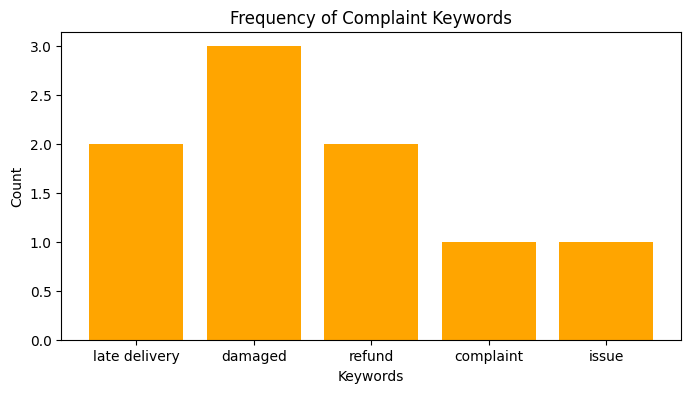


Extracted Emails:
                                                text                    emails
0  Customer email: john.doe@example.com reported ...    [john.doe@example.com]
1  Call support at 555-123-4567 to report damaged...                        []
2  Refund request submitted by jane.smith@domain....   [jane.smith@domain.com]
3  Late delivery complaint, contact 555-987-6543 ...                        []
4               Amazing service! No issues reported.                        []
5  Damaged item, contact support at support@globa...  [support@globalmart.com]
6        Customer feedback: loved the fast shipping!                        []
7  Refund request: john.doe@example.com - item da...    [john.doe@example.com]

Extracted Phone Numbers:
                                                text          phones
0  Customer email: john.doe@example.com reported ...              []
1  Call support at 555-123-4567 to report damaged...  [555-123-4567]
2  Refund request submitted by jane.s

In [11]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# ----------------------------
# 1. Example Business Dataset
# ----------------------------
reviews = [
    "Customer email: john.doe@example.com reported late delivery.",
    "Call support at 555-123-4567 to report damaged product.",
    "Refund request submitted by jane.smith@domain.com.",
    "Late delivery complaint, contact 555-987-6543 immediately.",
    "Amazing service! No issues reported.",
    "Damaged item, contact support at support@globalmart.com or 555-000-1111.",
    "Customer feedback: loved the fast shipping!",
    "Refund request: john.doe@example.com - item damaged.",
]

df = pd.DataFrame(reviews, columns=["text"])

# ----------------------------
# 2. Extract Emails
# ----------------------------
email_pattern = r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"
df['emails'] = df['text'].apply(lambda x: re.findall(email_pattern, x))

# ----------------------------
# 3. Extract Phone Numbers
# ----------------------------
phone_pattern = r"\b\d{3}[-.\s]?\d{3}[-.\s]?\d{4}\b"
df['phones'] = df['text'].apply(lambda x: re.findall(phone_pattern, x))

# ----------------------------
# 4. Find Keywords Related to Complaints
# ----------------------------
keywords = ["refund", "late delivery", "damaged", "issue", "complaint"]
keyword_pattern = r"|".join([re.escape(k) for k in keywords])

df['keywords_found'] = df['text'].apply(lambda x: re.findall(keyword_pattern, x, flags=re.IGNORECASE))

# ----------------------------
# 5. Summary Statistics
# ----------------------------
# Flatten lists for counts
all_keywords = [kw.lower() for sublist in df['keywords_found'] for kw in sublist]
keyword_counts = Counter(all_keywords)

print("Keyword Frequencies:")
print(keyword_counts)

# ----------------------------
# 6. Visualization
# ----------------------------
plt.figure(figsize=(8,4))
plt.bar(keyword_counts.keys(), keyword_counts.values(), color="orange")
plt.title("Frequency of Complaint Keywords")
plt.xlabel("Keywords")
plt.ylabel("Count")
plt.show()

# ----------------------------
# 7. Display Extracted Emails and Phones
# ----------------------------
print("\nExtracted Emails:")
print(df[['text','emails']])

print("\nExtracted Phone Numbers:")
print(df[['text','phones']])


##**Part 2 - Encoding Schemes**

## **Exercise 7: Implementing ASCII**

**Scenario:** GlobalMart, a retail company, collects thousands of customer reviews. They want to:
* Convert reviews into numerical representations for storage, encryption, or ML input.
* Detect patterns in feedback, like spam reviews or unusual content.
* Perform basic text analytics on ASCII codes (e.g., average character code, frequency distributions).

**Task:** Implement ASCII-based features as a lightweight alternative for numeric representations without embedding models.

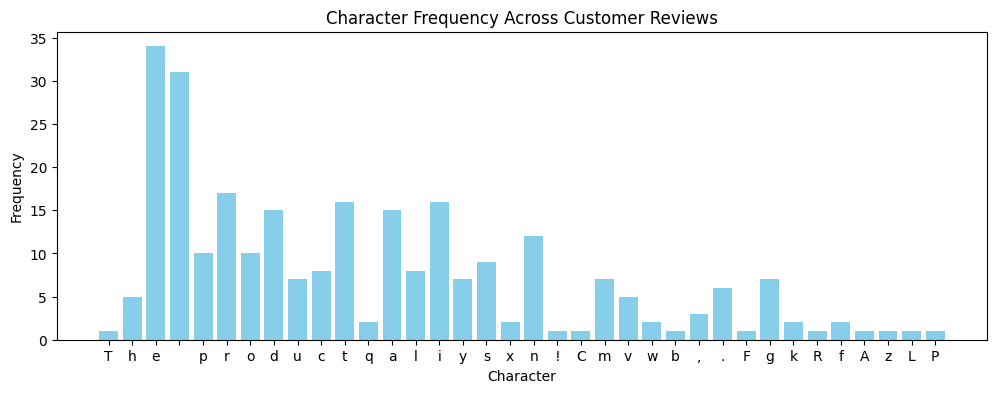

ASCII Codes & Average per Review:
                                           review  \
0               The product quality is excellent!   
1       Customer service was terrible, not happy.   
2              Fast delivery and great packaging.   
3           Refund requested due to damaged item.   
4  Amazing shopping experience, highly recommend.   
5               Late delivery, very disappointed.   
6    Product arrived on time and works perfectly.   

                                         ascii_codes  avg_ascii  
0  [84, 104, 101, 32, 112, 114, 111, 100, 117, 99...  96.363636  
1  [67, 117, 115, 116, 111, 109, 101, 114, 32, 11...  95.707317  
2  [70, 97, 115, 116, 32, 100, 101, 108, 105, 118...  94.441176  
3  [82, 101, 102, 117, 110, 100, 32, 114, 101, 11...  94.027027  
4  [65, 109, 97, 122, 105, 110, 103, 32, 115, 104...  97.043478  
5  [76, 97, 116, 101, 32, 100, 101, 108, 105, 118...  96.424242  
6  [80, 114, 111, 100, 117, 99, 116, 32, 97, 114,...  95.977273  


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# -----------------------------
# 1. Example Business Dataset
# -----------------------------
reviews = [
    "The product quality is excellent!",
    "Customer service was terrible, not happy.",
    "Fast delivery and great packaging.",
    "Refund requested due to damaged item.",
    "Amazing shopping experience, highly recommend.",
    "Late delivery, very disappointed.",
    "Product arrived on time and works perfectly."
]

df = pd.DataFrame(reviews, columns=["review"])

# -----------------------------
# 2. Convert Text to ASCII Codes
# -----------------------------
def text_to_ascii(text):
    return [ord(c) for c in text]

df['ascii_codes'] = df['review'].apply(text_to_ascii)

# -----------------------------
# 3. Convert ASCII back to text (verification)
# -----------------------------
def ascii_to_text(ascii_list):
    return "".join([chr(c) for c in ascii_list])

df['reconstructed'] = df['ascii_codes'].apply(ascii_to_text)

# -----------------------------
# 4. ASCII-based Feature Extraction
# -----------------------------
# Average ASCII value per review
df['avg_ascii'] = df['ascii_codes'].apply(lambda x: sum(x)/len(x))

# Count frequency of characters across all reviews
all_ascii = [c for codes in df['ascii_codes'] for c in codes]
char_counts = Counter(all_ascii)

# Map ASCII codes back to characters for readability
char_counts_readable = {chr(k):v for k,v in char_counts.items()}

# -----------------------------
# 5. Visualization: Character Frequency
# -----------------------------
plt.figure(figsize=(12,4))
plt.bar(char_counts_readable.keys(), char_counts_readable.values(), color="skyblue")
plt.title("Character Frequency Across Customer Reviews")
plt.xlabel("Character")
plt.ylabel("Frequency")
plt.show()

# -----------------------------
# 6. Display Results
# -----------------------------
print("ASCII Codes & Average per Review:")
print(df[['review','ascii_codes','avg_ascii']])


## **Exercise 8: Implementing Unicode**

**Scenario:** IntelliMart, a global e-commerce company, receives customer reviews in multiple languages including English, Arabic, Spanish, and emoji-rich feedback. They want to:

* Convert text into Unicode code points to handle multilingual reviews.
* Extract features like emoji usage, special symbols, and language-specific characters.
* Detect patterns in positive/negative feedback, emotional cues, or spam reviews.

**Task:** Use By Unicode processing to analyze all text uniformly, regardless of the language or special characters.

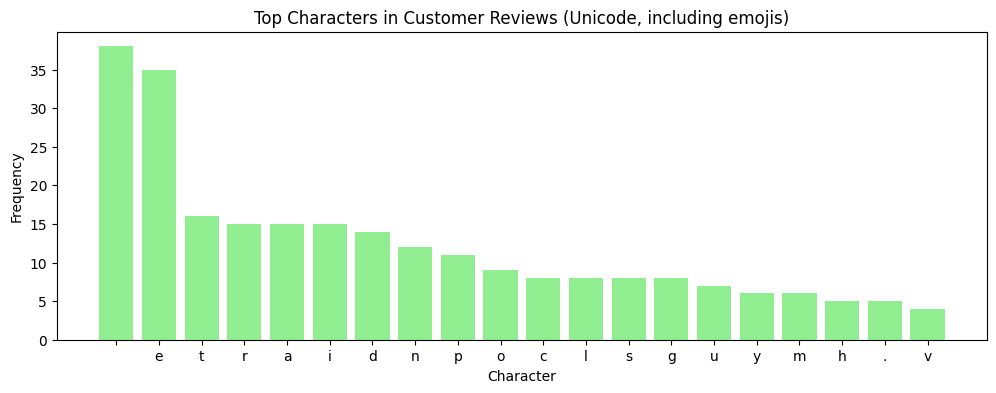

                                              review  \
0                The product quality is excellent! 😍   
1        Customer service was terrible, not happy. 😡   
2               Fast delivery and great packaging. 👍   
3           Refund requested due to damaged item. 🛠️   
4  Amazing shopping experience, highly recommend. 🛍️   
5                Late delivery, very disappointed. 😞   
6                             منتج رائع وخدمة ممتازة   
7             Entrega rápida, producto excelente! 🇪🇸   
8                                       商品质量很好，配送快速！   

                                       unicode_codes   avg_unicode  
0  [84, 104, 101, 32, 112, 114, 111, 100, 117, 99...   3763.914286  
1  [67, 117, 115, 116, 111, 109, 101, 114, 32, 11...   3081.418605  
2  [70, 97, 115, 116, 32, 100, 101, 108, 105, 118...   3647.777778  
3  [82, 101, 102, 117, 110, 100, 32, 114, 101, 11...   4932.150000  
4  [65, 109, 97, 122, 105, 110, 103, 32, 115, 104...   4045.959184  
5  [76, 97, 116, 101, 32,

In [13]:
# Packages
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# -----------------------------
# 1. Example Business Dataset (multilingual + emojis)
# -----------------------------
reviews = [
    "The product quality is excellent! 😍",
    "Customer service was terrible, not happy. 😡",
    "Fast delivery and great packaging. 👍",
    "Refund requested due to damaged item. 🛠️",
    "Amazing shopping experience, highly recommend. 🛍️",
    "Late delivery, very disappointed. 😞",
    "منتج رائع وخدمة ممتازة",  # Arabic: Excellent product and service
    "Entrega rápida, producto excelente! 🇪🇸",  # Spanish: Fast delivery, excellent product
    "商品质量很好，配送快速！",  # Chinese: Good product quality, fast delivery
]

df = pd.DataFrame(reviews, columns=["review"])

# -----------------------------
# 2. Convert Text to Unicode Code Points
# -----------------------------
def text_to_unicode(text):
    """Convert each character to its Unicode code point"""
    return [ord(c) for c in text]

df['unicode_codes'] = df['review'].apply(text_to_unicode)

# -----------------------------
# 3. Convert Unicode back to text (verification)
# -----------------------------
def unicode_to_text(unicode_list):
    return "".join([chr(c) for c in unicode_list])

df['reconstructed'] = df['unicode_codes'].apply(unicode_to_text)

# -----------------------------
# 4. Feature Extraction
# -----------------------------
# Average Unicode value per review
df['avg_unicode'] = df['unicode_codes'].apply(lambda x: sum(x)/len(x))

# Count all Unicode characters across reviews
all_unicode_chars = [c for codes in df['unicode_codes'] for c in codes]
unicode_counts = Counter(all_unicode_chars)

# Map back to characters for readability
char_counts_readable = {chr(k): v for k,v in unicode_counts.items()}

# -----------------------------
# 5. Visualization: Top 20 Characters (including emojis)
# -----------------------------
top_chars = dict(sorted(char_counts_readable.items(), key=lambda item: item[1], reverse=True)[:20])
plt.figure(figsize=(12,4))
plt.bar(top_chars.keys(), top_chars.values(), color="lightgreen")
plt.title("Top Characters in Customer Reviews (Unicode, including emojis)")
plt.xlabel("Character")
plt.ylabel("Frequency")
plt.show()

# -----------------------------
# 6. Display Results
# -----------------------------
print(df[['review','unicode_codes','avg_unicode']])


## **Exercise 9: Implementing UTF-8**

**Scenario:** Congolian, a global e-commerce platform, collects customer reviews, support emails, and feedback in multiple languages including English, Arabic, Spanish, and emoji-rich content. They want to:

* Encode all reviews into UTF-8 for database storage and transmission.
* Decode UTF-8 back to text for analysis or visualization.
* Detect encoding issues, non-UTF-8 content, or malformed characters.
* Analyze multilingual content uniformly for sentiment, keywords, or patterns.

**Task:** As a consultant, implement the above for them.

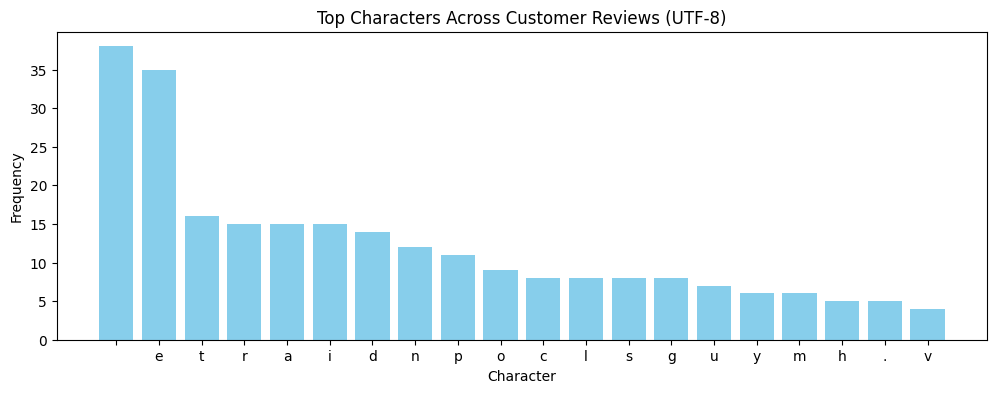

                                              review  \
0                The product quality is excellent! 😍   
1        Customer service was terrible, not happy. 😡   
2               Fast delivery and great packaging. 👍   
3           Refund requested due to damaged item. 🛠️   
4  Amazing shopping experience, highly recommend. 🛍️   
5                Late delivery, very disappointed. 😞   
6                             منتج رائع وخدمة ممتازة   
7             Entrega rápida, producto excelente! 🇪🇸   
8                                       商品质量很好，配送快速！   

                                                                                          utf8_encoded  \
0                                                b'The product quality is excellent! \xf0\x9f\x98\x8d'   
1                                        b'Customer service was terrible, not happy. \xf0\x9f\x98\xa1'   
2                                               b'Fast delivery and great packaging. \xf0\x9f\x91\x8d'   
3              

In [14]:
# Packages
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# -----------------------------
# 1. Example Business Dataset (multilingual + emojis)
# -----------------------------
reviews = [
    "The product quality is excellent! 😍",
    "Customer service was terrible, not happy. 😡",
    "Fast delivery and great packaging. 👍",
    "Refund requested due to damaged item. 🛠️",
    "Amazing shopping experience, highly recommend. 🛍️",
    "Late delivery, very disappointed. 😞",
    "منتج رائع وخدمة ممتازة",  # Arabic: Excellent product and service
    "Entrega rápida, producto excelente! 🇪🇸",  # Spanish
    "商品质量很好，配送快速！",  # Chinese
]

df = pd.DataFrame(reviews, columns=["review"])

# -----------------------------
# 2. Encode each review as UTF-8 bytes
# -----------------------------
df['utf8_encoded'] = df['review'].apply(lambda x: x.encode('utf-8'))

# -----------------------------
# 3. Decode UTF-8 bytes back to text
# -----------------------------
df['utf8_decoded'] = df['utf8_encoded'].apply(lambda x: x.decode('utf-8'))

# -----------------------------
# 4. Feature Extraction: Character Frequency
# -----------------------------
# Flatten all characters
all_chars = [c for text in df['utf8_decoded'] for c in text]
char_counts = Counter(all_chars)

# Top 20 characters
top_chars = dict(sorted(char_counts.items(), key=lambda item: item[1], reverse=True)[:20])

# -----------------------------
# 5. Visualization: Top Characters
# -----------------------------
plt.figure(figsize=(12,4))
plt.bar(top_chars.keys(), top_chars.values(), color="skyblue")
plt.title("Top Characters Across Customer Reviews (UTF-8)")
plt.xlabel("Character")
plt.ylabel("Frequency")
plt.show()

# -----------------------------
# 6. Display Results
# -----------------------------
pd.set_option("display.max_colwidth", 100)
print(df[['review','utf8_encoded','utf8_decoded']])
